<a href="https://colab.research.google.com/github/MadhusudhanRangaswamaiah/EVA-Session-4/blob/master/4th_DNN_ntw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourth Network

With this we need to achieve a target of 99.4% Validation accuracy with 15K parameters.

In this network, only some fine tuning of # of filters (no. of parameters), epoch adjustments are done to meet the target.

***Finally, I could achieve 99.34% (changes slightly both ways with every Run) of Validation accuracy with 14,013 parameters.***


 


# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
                      #The Python Package Index (PyPI) is a repository of 
                      #software for the Python programming language.
    
                      #pip installs Keras. Keras is an open network open-source 
                      #neural-network library written in Python. 
import keras
                      #Python code in this module gains access to the code 
                      #in Keras module by the process of importing it using 
                      #the import statement.
      
                      #Keras is an open source neural-network library written 
                      #in Python.
                      #Keras-Modular: Building models is as simple as stacking 
                      #layers and connecting graphs.

Using TensorFlow backend.


In [0]:
import numpy as np    # import numpy package as np (alias)
from keras.models import Sequential
                                        #The core data structure of Keras is 
                                        #a model (a way to organize layers)
                                        #The Simplest type of model is 
                                        #Sequential Model (a linear stack of 
                                        #layers)
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization 
from keras.utils import np_utils

from keras.datasets import mnist        #MNIST database of handwritten digits
                                        #Dataset of 60,000 28x28 grayscale 
                                        #images of the 10 digits, along with a 
                                        #test set of 10,000 images.

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Returns 2 Tuples - 
                                                           
#1. x_train, x_test: uint8 array of grayscale image data with shape 
#   (num_samples, 28, 28).
#2. y_train, y_test: uint8 array of digit labels (integers in range 0-9) with 
#   shape (num_samples,).

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


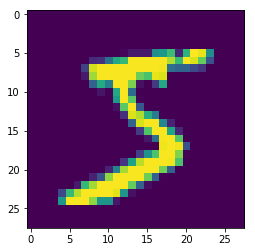

In [4]:
print (X_train.shape)#Prints the dimension of the array X_train-
                     # Dataset of 60,000 28x28 grayscale images of the 10 digits
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])#Displays the first image in X_train Dataset

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
# (60000, 28, 28, 1)==>(nb_samples, width, height, nb_channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# (10000, 28, 28, 1)==>(nb_samples, width, height, nb_channels)

In [0]:
X_train = X_train.astype('float32')  #Convert X_train data from uint8 (0to255)
                                     #to float32 
X_test = X_test.astype('float32')    #Convert X_test data from uint8 (0to255) 
                                     #to float32
X_train /= 255                       #Normalize X_train data
X_test /= 255                        #Normalize X_test data

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]
#uint8 array of labels (integers in range 0-9) with shape (num_samples,)==> 
#First 10 Data

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))

#(# of filters, Kernel Size, activation='relu',
#input shape must be specified for first Layer-->28x28 (1 Channel))
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(28x28x(1Channel)|(3x3x(1Channel)x(32 no. of filters)|(26x26x(32 no. of channels))o/p

model.add(Dropout(0.25))

##
#model.add(BatchNormalization())
##

model.add(MaxPooling2D(pool_size = (2,2)))

#MaxPooling --> o/p 13x13x(32 no. of channels)

model.add(Convolution2D(32, 3, 3, activation='relu'))

#(# of filters, Kernel Size, activation='relu',
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(13x213x(32 Channel)|(3x3x(32Channel)x(32 no. of filters)|(11x11x(32 no. of channels))o/p

##
#model.add(BatchNormalization())
##

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size = (2,2)))

#MaxPooling --> o/p 5x5x(32 no. of channels)

model.add(Convolution2D(29, 3, 3, activation='relu'))

#(# of filters, Kernel Size, activation='relu',
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(5x5x(32 Channel)|(3x3x(32Channel)x(32 no. of filters)|(3x3x(32 no. of channels))o/p

##
#model.add(BatchNormalization())
##

model.add(Dropout(0.25))

model.add(Convolution2D(10, 3))
#'relu' - Rectified Linear Unit: returns element-wise max(x, 0).
#i/p(3x3x(1Channel)|(3x3x(32Channel)x(10 no. of filters)|(1x1x(10 no. of channels))o/p

#model.add(Dropout(0.25))


model.add(Flatten())
# now: model.output_shape == (None, 10)
# Flattening means to remove all of the dimensions except for one.

model.add(Activation('softmax'))
#Softmax function that takes as input a vector of K real numbers, and normalizes it into a 
#probability distribution consisting of K probabilities.
#That is, prior to applying softmax, some vector components could be negative, or greater than one; 
#and might not sum to 1; but after applying softmax, each component will be in the interval ( 0 , 1 ), 
#and the components will add up to 1, so that they can be interpreted as probabilities.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(29, (3, 3), activation="relu")`


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        2912      
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 29)          8381      
__________

In [12]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#model.compile(loss='categorical_crossentropy',
#             optimizer='adam',
#             metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',
#             optimizer=Adam(lr=0.0003120774),
#             metrics=['accuracy'])
#categorical_crossentropy - It compares the predicted label and true label and calculates the loss. 
#When doing multi-class classification, categorical cross entropy loss is used a lot.

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 7s 123us/step - loss: 0.2862 - acc: 0.9102 - val_loss: 0.0865 - val_acc: 0.9789
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 3s 49us/step - loss: 0.0890 - acc: 0.9737 - val_loss: 0.0585 - val_acc: 0.9854
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 3s 48us/step - loss: 0.0696 - acc: 0.9786 - val_loss: 0.0491 - val_acc: 0.9881
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 3s 47us/step - loss: 0.0588 - acc: 0.9817 - val_loss: 0.0390 - val_acc: 0.9890
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learn

In [0]:
#model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)
#Trains the model for the given number of epochs (iterations on a Dataset).

In [0]:
#score = model.evaluate(X_test, Y_test, verbose=0)#Returns loss value and metric values for the Test Dataset

In [0]:
#print(score)

In [0]:
y_pred = model.predict(X_test)#Generate output predictions for the input data.

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.06946336e-05 8.60529599e-06 4.92362888e-05 7.36157090e-05
  1.69422609e-08 3.97032045e-06 3.76427882e-12 9.99745309e-01
  7.22871528e-06 1.01292375e-04]
 [3.10197865e-05 8.20540648e-04 9.99130428e-01 1.15325031e-06
  2.23153873e-09 1.24287327e-08 1.27844396e-05 5.06630400e-08
  3.87608134e-06 2.10771803e-10]
 [3.61101343e-06 9.99637365e-01 1.28013244e-05 7.98566532e-07
  9.32194453e-05 1.99009392e-05 2.19046942e-05 1.39349548e-04
  6.90172456e-05 2.07637504e-06]
 [9.97752607e-01 2.08014477e-08 7.77738387e-05 2.45515548e-06
  4.46256962e-07 4.19790122e-05 1.97750377e-03 5.79507878e-06
  1.20179990e-04 2.12169343e-05]
 [2.74917647e-06 5.03589035e-07 4.51954492e-07 7.40736681e-08
  9.99301791e-01 7.42108853e-07 1.44354044e-05 8.26213727e-06
  2.00286577e-05 6.50883652e-04]
 [7.90780746e-07 9.99758065e-01 3.91923777e-06 5.97869487e-08
  2.02562223e-05 9.21462913e-07 2.41535099e-06 2.02978859e-04
  1.01240212e-05 4.50447033e-07]
 [4.08552192e-10 7.75615445e-06 5.21329525e-07 2.99806189e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored